### Student Information
Name:王玟婷

Student ID: 41021112L

GitHub ID: 

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

In [2]:
# categories
sentiment = ['nostalgia', 'not nostalgia']
sentiment

['nostalgia', 'not nostalgia']

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

X = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [4]:
X[0:9]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart

In [5]:
len(X)

1500

In [6]:
# add sentiment_number to the dataframe
sentiment_mapping = {'nostalgia': 0, 'not nostalgia': 1}
X['sentiment_number'] = X['sentiment'].map(sentiment_mapping)
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   sentiment_number  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
5                 0  
6                 0  
7                 0  
8                 1

In [7]:
#a simple query
X[0:9][['sentiment','comment']]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart

In [8]:
#use loc to find the top 12th comment 
X.loc[:12,'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
11    this song came out my senior year in high scho...
12    A few years back picked up at a charity shop a...
Name: comment, dtype: object

In [9]:
#use iloc to find the top 12th comment
X.iloc[0:12]['comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
11    this song came out my senior year in high scho...
Name: comment, dtype: object

In [10]:
#use query to find the objects with nostalgia sentiment
X.query('"nostalgia" in sentiment')

sentiment                                            comment  \
1     nostalgia  The mist beautiful voice ever I listened to hi...   
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...   
4     nostalgia  listening to his songs reminds me of my mum wh...   
5     nostalgia  Every time I heard this song as a child, I use...   
6     nostalgia  My dad loved listening to Jim Reeves, when I w...   
...         ...                                                ...   
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...   
1491  nostalgia  real music...how i miss those days...brings ba...   
1492  nostalgia  i used to cry over this song cause i had a boy...   
1498  nostalgia  I was born in 1954 and started to be aware of ...   
1499  nostalgia  This is the first CD I bought after my marriag...   

      sentiment_number  
1                    0  
2                    0  
4                    0  
5                    0  
6                    0  
...                ...  
1488                 0  
1491                 0  
1492                 0  
1498                 0  
1499                 0  

[750 rows x 3 columns]

In [11]:
X.loc[lambda X: X['sentiment_number']==0][::10][:5]

sentiment                                            comment  \
1   nostalgia  The mist beautiful voice ever I listened to hi...   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...   
32  nostalgia  I remember my Mom listening to Jim over and ov...   
50  nostalgia  If I remember correctly, this song came out af...   
71  nostalgia  Gosh does this bring back memories. Nearly eve...   

    sentiment_number  
1                  0  
18                 0  
32                 0  
50                 0  
71                 0

## Checking null values

In [12]:
# check missing values
X.isnull()

sentiment  comment  sentiment_number
0         False    False             False
1         False    False             False
2         False    False             False
3         False    False             False
4         False    False             False
...         ...      ...               ...
1495      False    False             False
1496      False    False             False
1497      False    False             False
1498      False    False             False
1499      False    False             False

[1500 rows x 3 columns]

In [13]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                     sentiment_number  
0  The amoung of missing records is:   
1                                   0

In [14]:
X.isnull().apply(lambda x:dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [15]:
#create a dummy series
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "sentiment"])
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [16]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                     sentiment_number  
0  The amoung of missing records is:   
1                                   1

In [17]:
X.dropna(inplace=True)

In [18]:
len(X)

1500

## Duplicate Data

In [19]:
len(X)

1500

In [20]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [21]:
sum(X.duplicated()) #duplicate data exists

1

In [22]:
sum(X.duplicated('comment'))

1

In [23]:
X.drop_duplicates(keep="first", inplace=True) #keep the first and discard the other

In [24]:
len(X)

1499

In [25]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   sentiment_number  
0                 1  
1                 0  
2                 0  
3                 1

## Sampling

In [26]:
X_sample = X.sample(n=500) #random state

In [27]:
len(X_sample)

500

In [28]:
X_sample[0:4]

sentiment                                            comment  \
760  not nostalgia  Human Angel...I'm dreaming...some one slap me....   
305  not nostalgia  Thank you for posting, this has always been on...   
142  not nostalgia  This is my favorite version of this song. But ...   
33   not nostalgia  It's great to hear the different generations o...   

     sentiment_number  
760                 1  
305                 1  
142                 1  
33                  1

In [29]:
#visualize the data and sample data
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

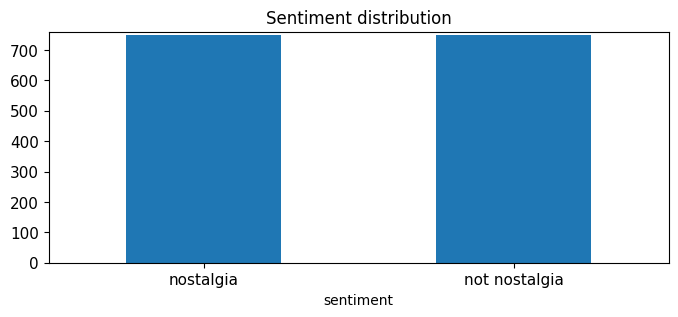

In [30]:
upper_bond= max(X.sentiment.value_counts() +10)
print(X.sentiment.value_counts())


# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bond],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    251
nostalgia        249
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (sample)'}, xlabel='sentiment'>

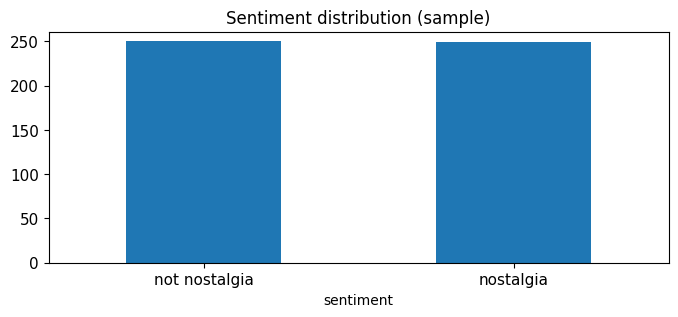

In [31]:
upper_bond_sample= max(X_sample.sentiment.value_counts() +10)
print(X_sample.sentiment.value_counts())


# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution (sample)',
                                    ylim = [0, upper_bond_sample],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

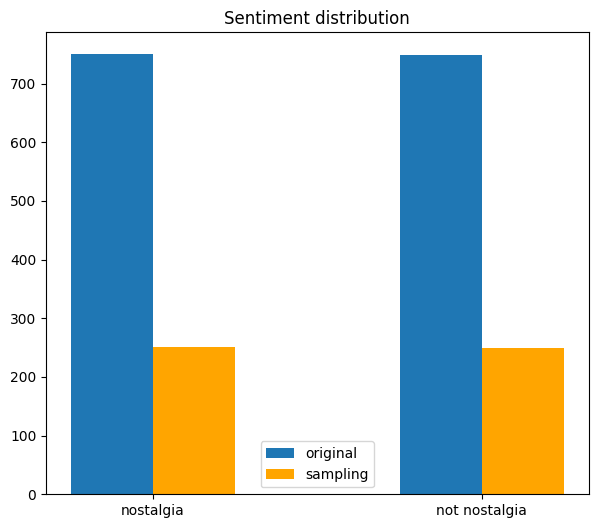

In [32]:
import numpy as np

original_counts = X.sentiment.value_counts()
sample_counts = X_sample.sentiment.value_counts()

plt.rcParams['figure.figsize']=(7,6)
labels =  original_counts.index

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_counts, width, label='original', )
rects2 = ax.bar(x + width/2, sample_counts, width, label='sampling',color = 'orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Sentiment distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Feature Creation

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\landy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
X[0:5]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [36]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   sentiment_number                                           unigrams  
0                 1  [He, was, a, singer, with, a, golden, voice, t...  
1                 0  [The, mist, beautiful, voice, ever, I, listene...  
2                 0  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3                 1  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [37]:
list(X['unigrams'][0])

['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

## Feature subset selection

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [39]:
count_vect.get_feature_names_out()[3000]

'skipper'

In [40]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [41]:
X_counts.shape

(1499, 3730)

In [42]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [43]:
X_counts[0:5,0:100].toarray() #extract the first five docs and the first 100 words

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [44]:
array = X_counts[0:5, 0:100].toarray()

# Iterate over the rows and columns of the array using indices
for i in range(array.shape[0]):  
    for j in range(array.shape[1]):  
        if array[i][j] >0 : # Check the values
            print(f'array[{i}][{j}] = {array[i][j]}')

array[0][15] = 1
array[2][16] = 1
array[3][62] = 1
array[3][90] = 1
array[3][91] = 1


In [45]:
#find out the words that exist once
print(count_vect.get_feature_names_out()[15])
print(count_vect.get_feature_names_out()[16])
print(count_vect.get_feature_names_out()[62])
print(count_vect.get_feature_names_out()[90])
print(count_vect.get_feature_names_out()[91])

16years
17
1st
2nd
30


In [46]:
#use the first 20 data to create a heatmap
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

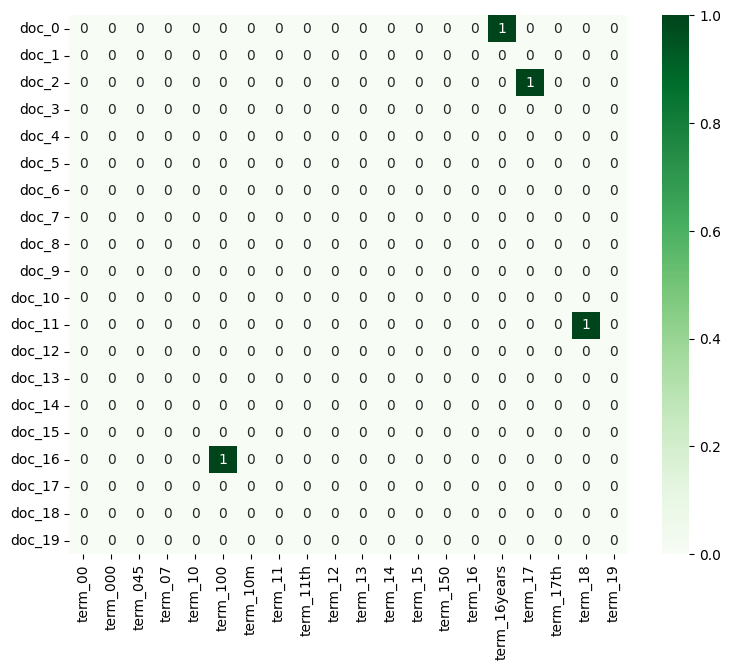

In [47]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="Greens",
                 vmin=0, vmax=1, annot=True)

##  Attribute Transformation / Aggregation

In [48]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [49]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

1

C:\Users\landy\AppData\Local\Temp\ipykernel_4320\4104656363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


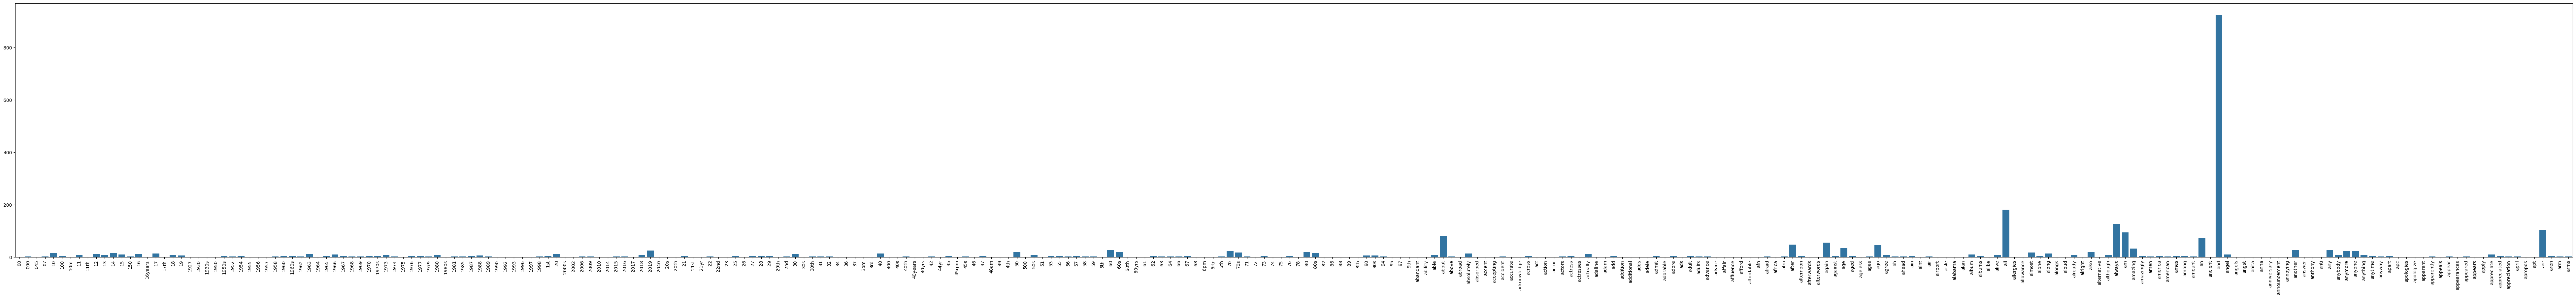

In [50]:
#visualization
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [51]:
#use plotly
import plotly.express as px
import plotly.graph_objects as go

df = pd.DataFrame({"Word": count_vect.get_feature_names_out()[:300], "Frequency": term_frequencies[:300]})
fig = px.bar(df, x="Word", y="Frequency")

fig.show()

In [52]:
#filter the words whose frequency are five or more
new_term_frequency=[]
new_word_name=[]
for i in range(0,300):
    if term_frequencies[i]>=5:
        new_term_frequency.append(term_frequencies[i])
        new_word_name.append(count_vect.get_feature_names_out()[i])
        
df=pd.DataFrame({"Word":new_word_name,"Frequency":new_term_frequency})
fig=px.bar(df, x="Word", y="Frequency", title="Filtered Word Frequencies (>= 5)", labels={"Word": "Words", "Frequency": "Word Count"})

fig.show()

In [53]:
#sort the datas in descending order

sorted_indices = np.argsort(term_frequencies)[::-1]  

reduce_term_frequencies = term_frequencies[sorted_indices][:300]
sorted_word_names = count_vect.get_feature_names_out()[sorted_indices][:300]

df = pd.DataFrame({"Word": sorted_word_names, "Frequency": reduce_term_frequencies})

fig = px.bar(df, x="Word", y="Frequency", title="Top 300 Word Frequencies", labels={"Word": "Words", "Frequency": "Word Count"})
fig.show()

C:\Users\landy\AppData\Local\Temp\ipykernel_4320\2637414043.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



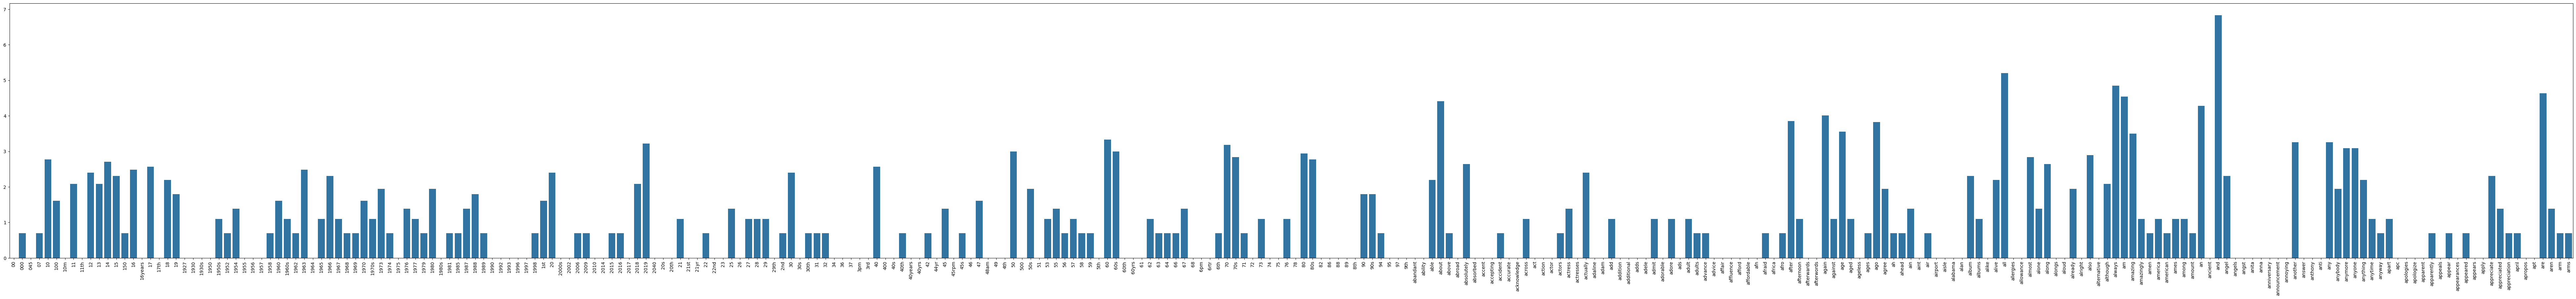

In [54]:
# transform the values into the log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## Finding frequent patterns

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sentiments = X['sentiment'].unique()  
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment_number in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment_number] = X[X['sentiment'] == sentiment_number].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sentiment_number in sentiments:
    filt_term_document_dfs[sentiment_number] = create_term_document_df(sentiment_dfs[sentiment_number])

In [56]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
search_sentiment=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[search_sentiment]}:")
filt_term_document_dfs[sentiments[search_sentiment]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

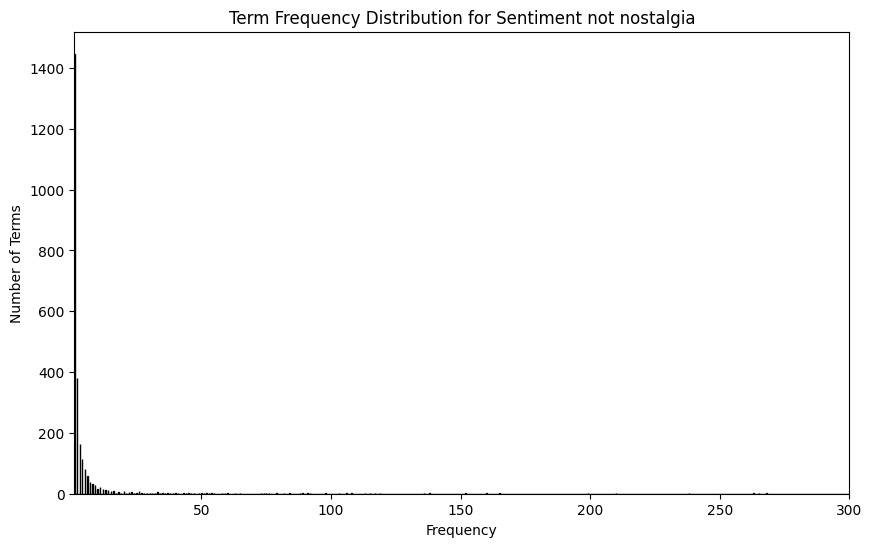

In [57]:
# Sum over all documents to get total frequency for each word
search_sentiment=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[search_sentiment]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[search_sentiment]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 300)
plt.show()

In [58]:
#filter the top 5% words
search_sentiment=0 
word_counts = filt_term_document_dfs[sentiments[search_sentiment]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]  

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[search_sentiment]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[search_sentiment]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those'

In [59]:
#filter the bottom 1% words
search_sentiment=0 
word_counts = filt_term_document_dfs[sentiments[search_sentiment]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order
sorted_indices = np.argsort(word_counts) 
sorted_counts = np.sort(word_counts)  

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Sentiment: {sentiments[search_sentiment]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed']


In [60]:
search_sentiment=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment_number in sentiments:
    print(f'\nFor sentiment {sentiment_number} we filter the following words:')
    term_document_dfs[sentiment_number] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment_number])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[search_sentiment]}:")
term_document_dfs[sentiments[search_sentiment]]


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

In [61]:
#check the words that were filtered in both sentiment
column_name={}
for i in range(0,2):
    column_name[sentiments[i]]=term_document_dfs[sentiments[i]].columns
    print(f"Words that were filtered in {sentiments[i]}:")
    print(column_name[sentiments[i]][500:600])

Words that were filtered in not nostalgia:
Index(['connotations', 'consider', 'considered', 'consolation', 'continue',
       'controlling', 'controls', 'conversation', 'converts', 'convince',
       'convinced', 'cookie', 'cookout', 'cool', 'cooler', 'coolest', 'copy',
       'correct', 'corresponding', 'couldn', 'countrify', 'country', 'couple',
       'coupled', 'couples', 'course', 'cousin', 'cover', 'covered', 'covers',
       'crafted', 'cramer', 'crap', 'crazy', 'create', 'created', 'creation',
       'credit', 'crematorium', 'crescendo', 'cried', 'crime', 'crop',
       'crossed', 'crowd', 'crown', 'crucifix', 'cruel', 'cruise', 'crush',
       'cry', 'crying', 'crystal', 'cuban', 'cup', 'curios', 'curious',
       'currently', 'curtis', 'cut', 'cute', 'cutter', 'cutting', 'dad',
       'daddy', 'damn', 'dance', 'dancing', 'dare', 'dark', 'darkness',
       'darling', 'darn', 'dated', 'dates', 'daughter', 'daughters', 'david',
       'davis', 'days', 'dc', 'dead', 'deal', 'dean

In [62]:
#use pami to observe the details
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment_number in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment_number.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment_number])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


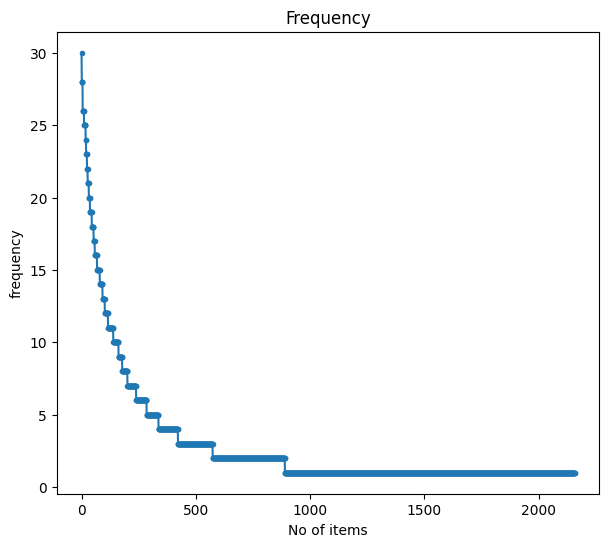

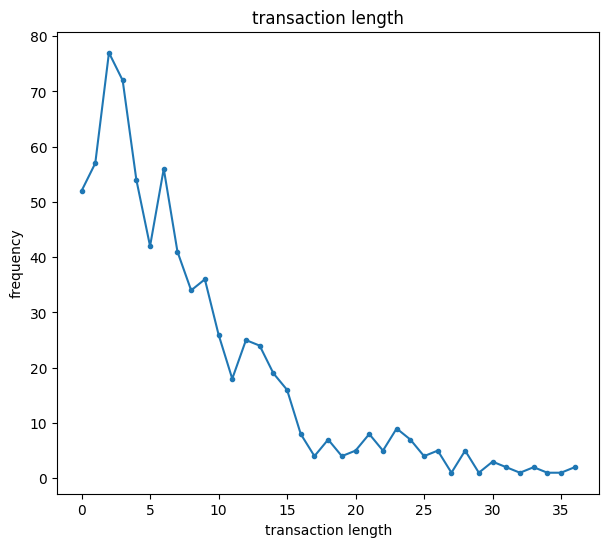

In [63]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


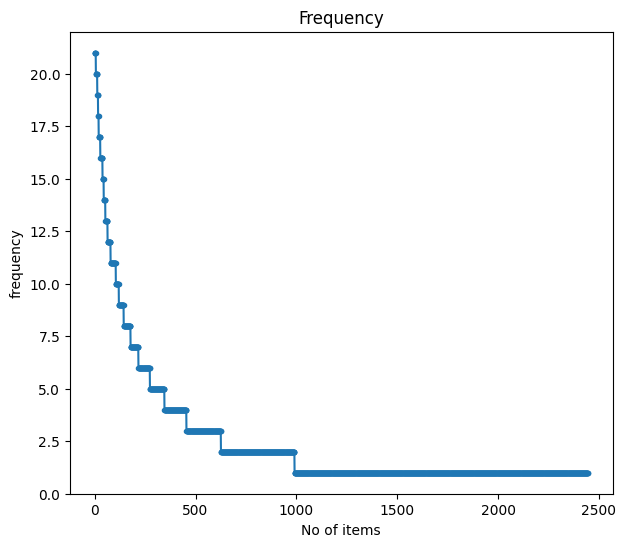

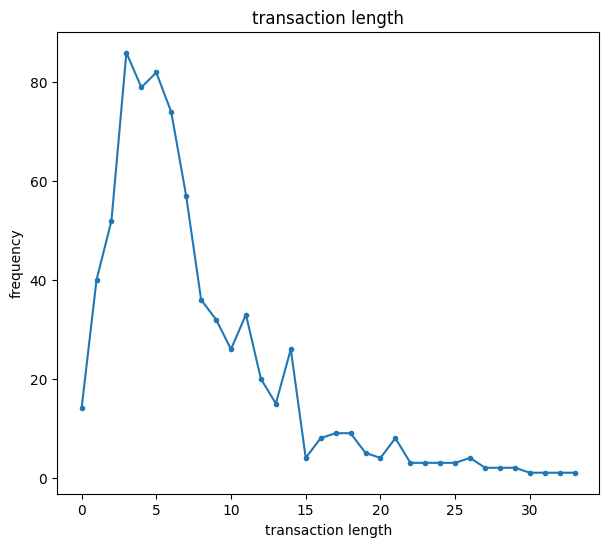

In [64]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [65]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=20
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 37
Runtime: 0.006197214126586914


In [66]:
obj1.save('frequentPatternsDF_nostalgia.txt')
frequentPatternsDF_nostalgia

Patterns  Support
0      early       20
1       well       20
2        did       20
3     lovely       20
4       girl       20
5      sweet       21
6        got       21
7       over       21
8         70       21
9       been       21
10     since       22
11      high       22
12   playing       22
13    memory       23
14     bring       23
15      long       23
16       sad       23
17     child       24
18      year       24
19       jim       25
20      away       25
21        by       25
22       has       25
23     today       25
24     about       25
25     could       25
26       kid       26
27      only       26
28      such       26
29      them       26
30        or       26
31      wish       26
32      ever       28
33     would       28
34      will       28
35        go       28
36  favorite       30

In [67]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=20
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 13
Runtime: 0.005194425582885742


In [68]:
obj1.save('frequentPatternsDF_not_nostalgia.txt')
frequentPatternsDF_not_nostalgia

Patterns  Support
0        days       20
1        well       20
2   wonderful       20
3        made       20
4    favorite       20
5      thanks       20
6          ve       20
7       elvis       21
8       every       21
9       loved       21
10    classic       21
11       them       21
12     lyrics       21

In [69]:
#discard the patterns that appear in both sentiments
import pandas as pd

dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one sentiment
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
43         go       28
42       will       28
41      would       28
40       ever       28
39       wish       26
38         or       26
37       such       26
36       only       26
35        kid       26
31        has       25
28        jim       25
29       away       25
30         by       25
34      could       25
32      today       25
33      about       25
27       year       24
26      child       24
23      bring       23
25        sad       23
24       long       23
22     memory       23
20       high       22
19      since       22
21    playing       22
14      sweet       21
5       elvis       21
7       loved       21
8     classic       21
9      lyrics       21
6       every       21
15        got       21
16       over       21
17         70       21
18       been       21
2        made       20
3      thanks       20
4          ve       20
1   wonderful       20
11        did       20
10      early       20
12     lovely       20
13       gi

In [70]:
#apply patterns on the original comment
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  
terms = count_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  been  made  thanks  \
0      0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1      0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
2      0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
3      0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
4      0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...   ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...     1     0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   

      ve  wonderful  did  early  lovely  girl  days  
0      0          0    0      0       0     0     1  
1      0          0    0      0       0     0     0  
2      0          0    0      0       0     0     0  
3      0          0    0      0       0     0     0  
4      0          0    0      0       0     0     0  
...   ..        ...  ...    ...     ...   ...   ...  
1495   0          0    0      0       0     0     0  
1496   0          0    0      0       0     0     0  
1497   0          0    0      0       0     0     0  
1498   0          0    0      0       0     0     0  
1499   0          0    0      0       0     0     0  

[1499 rows x 3774 columns]

## Dimensionality Reduction

In [71]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [72]:
X_pca_tdm.shape

(1499, 2)

In [73]:
X_tsne_tdm.shape

(1499, 2)

In [74]:
X_umap_tdm.shape

(1499, 2)

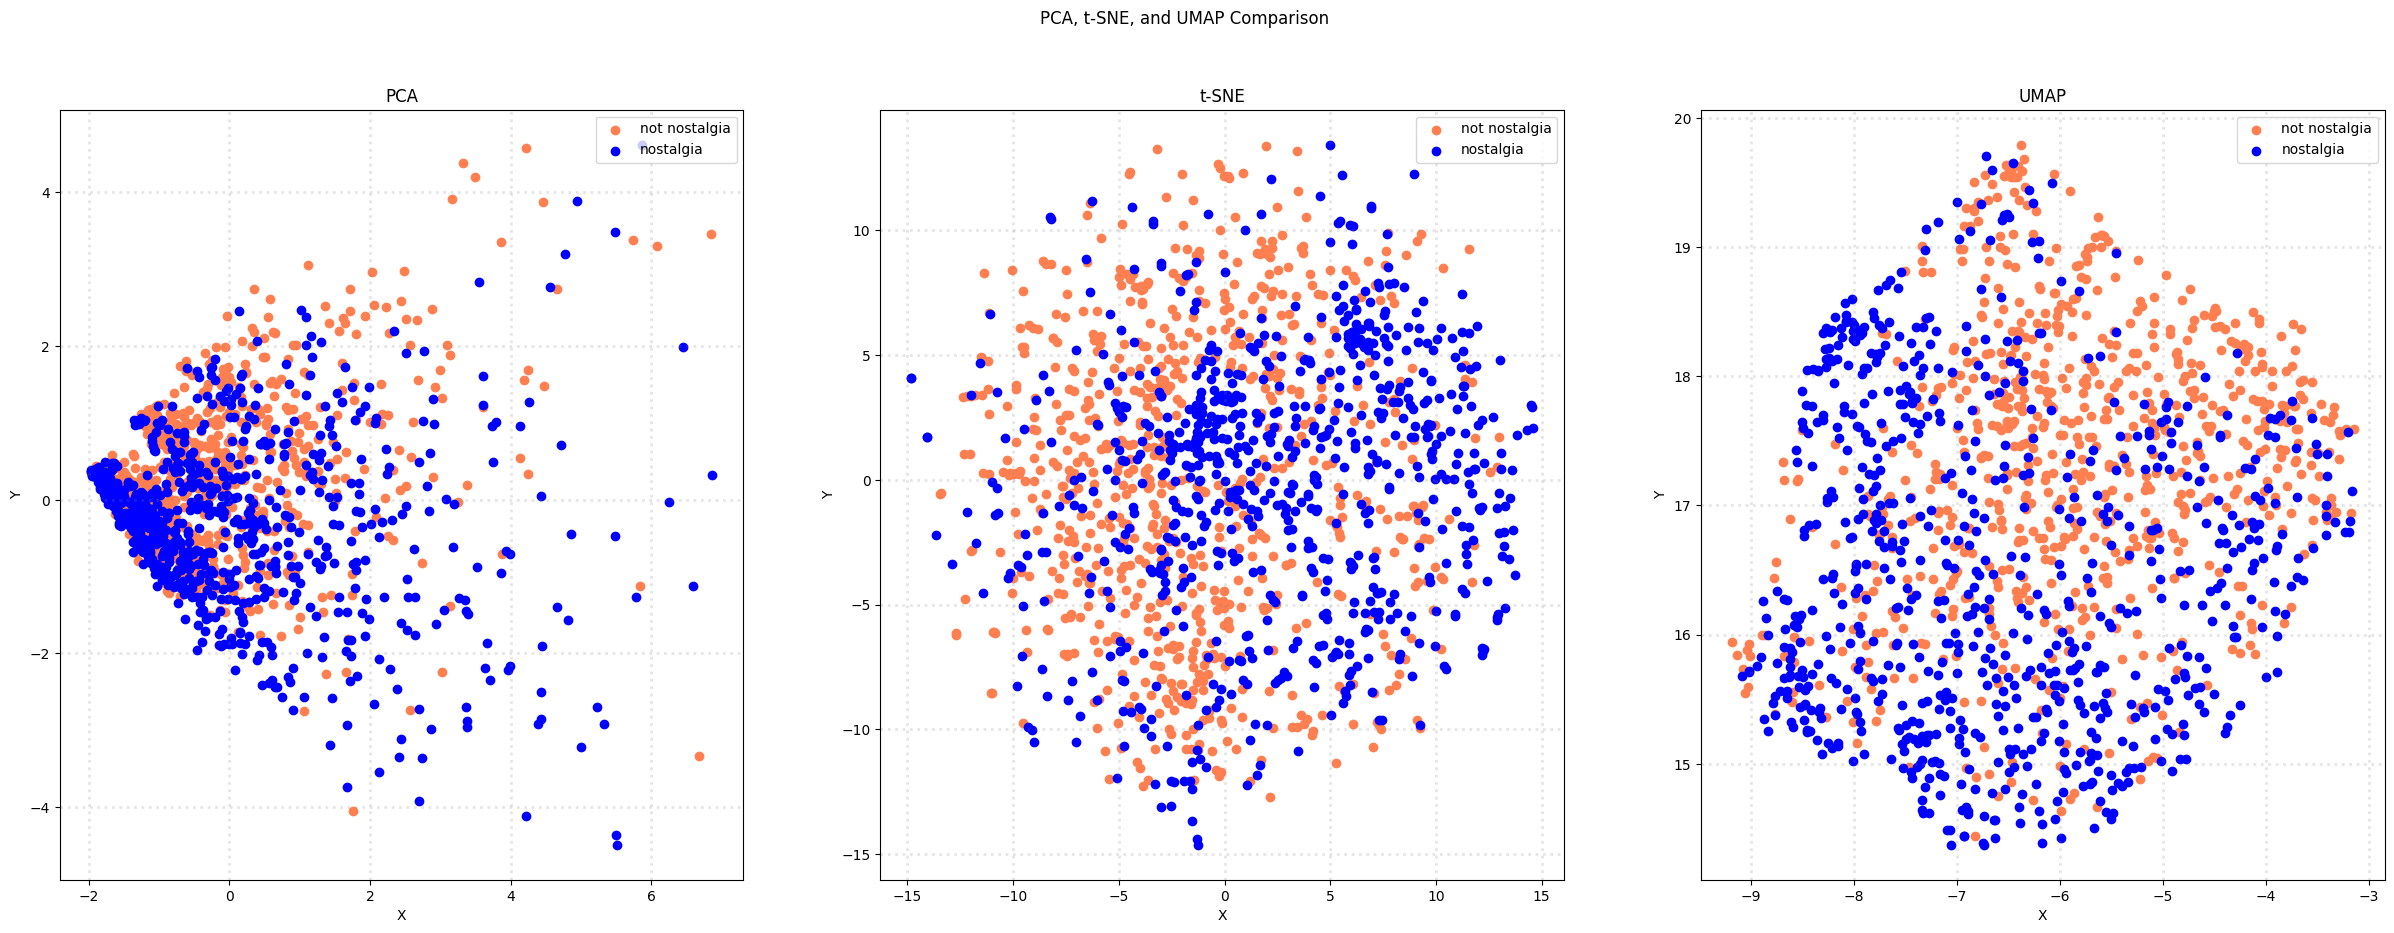

In [75]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment_number in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment_number].T[0]
        ys = X_reduced[X['sentiment'] == sentiment_number].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment_number)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [76]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

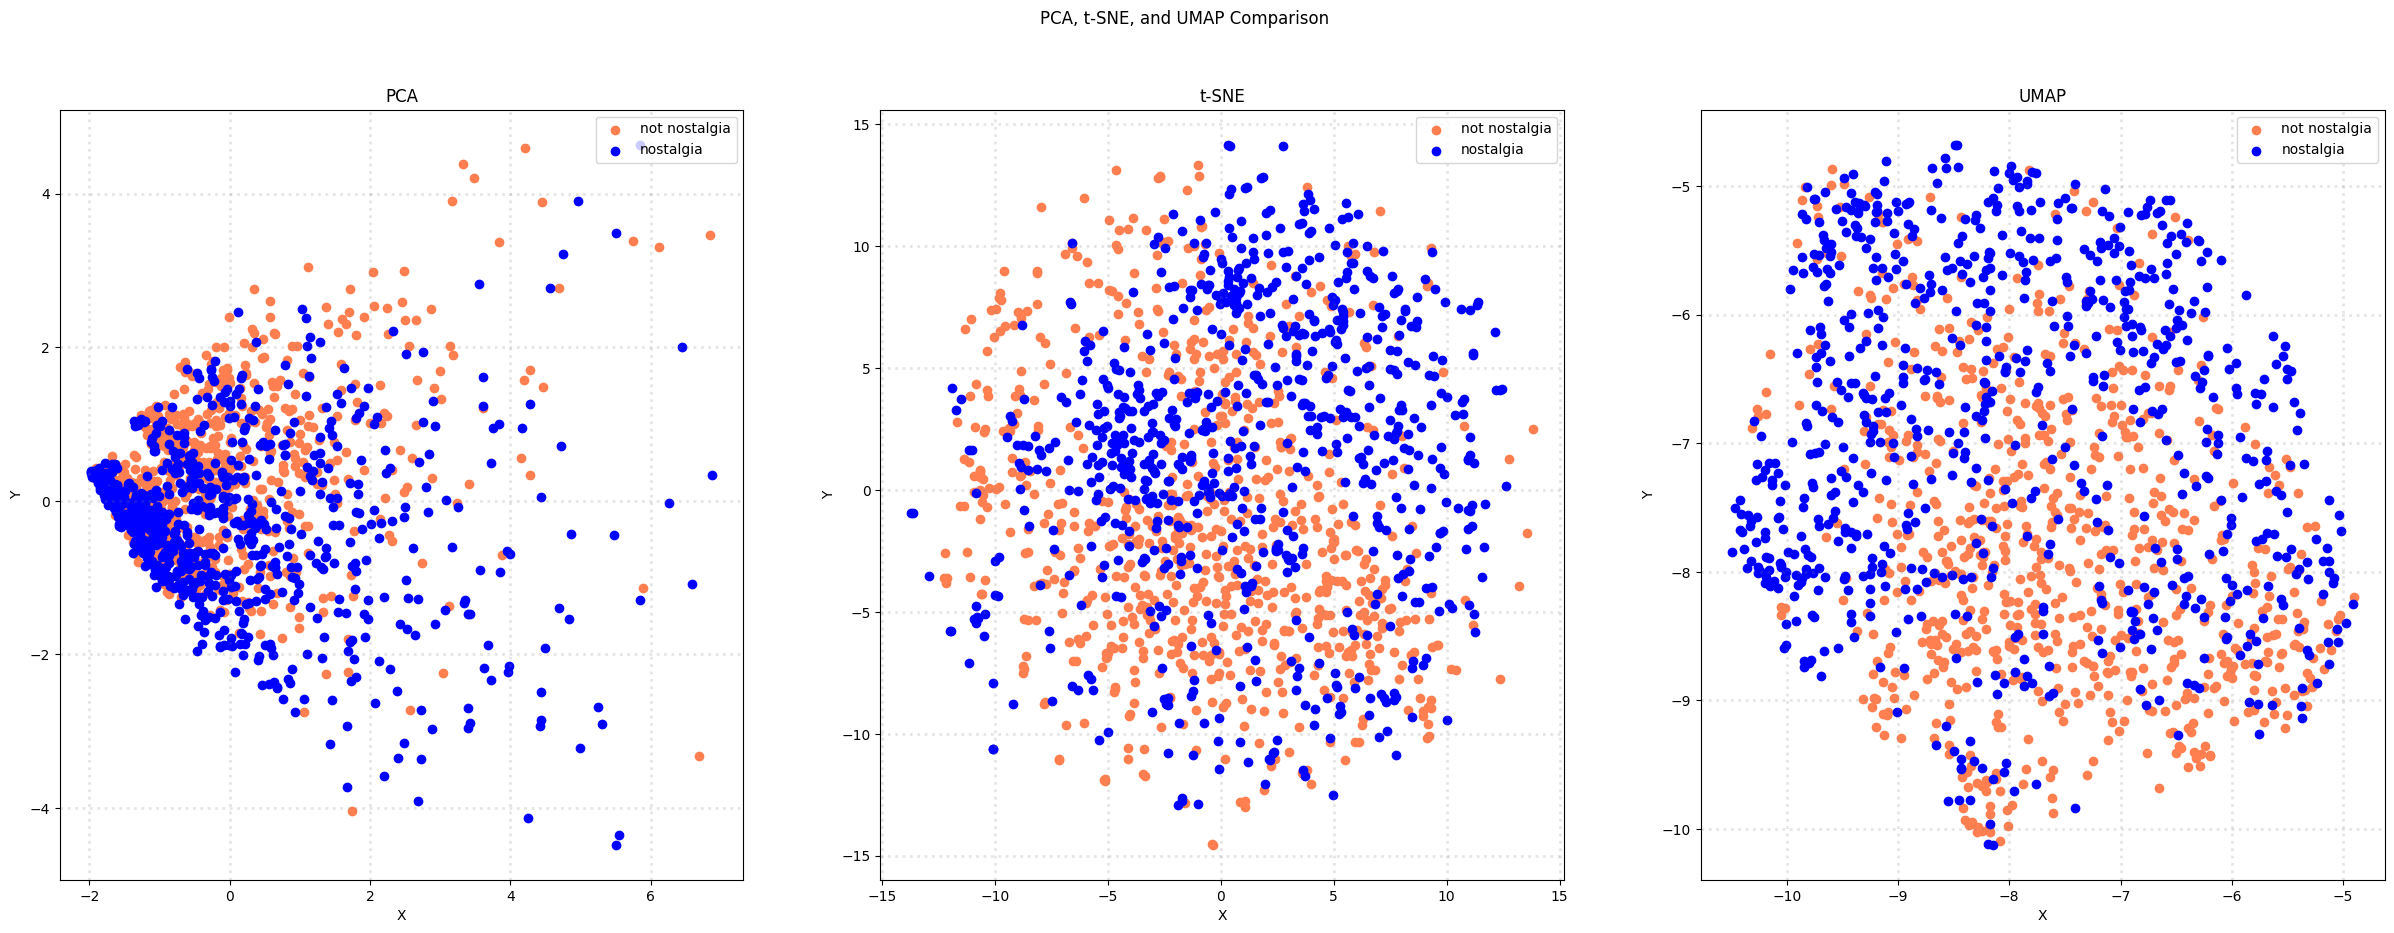

In [77]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment_number in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment_number].T[0]
        ys = X_reduced[X['sentiment'] == sentiment_number].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment_number)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [78]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

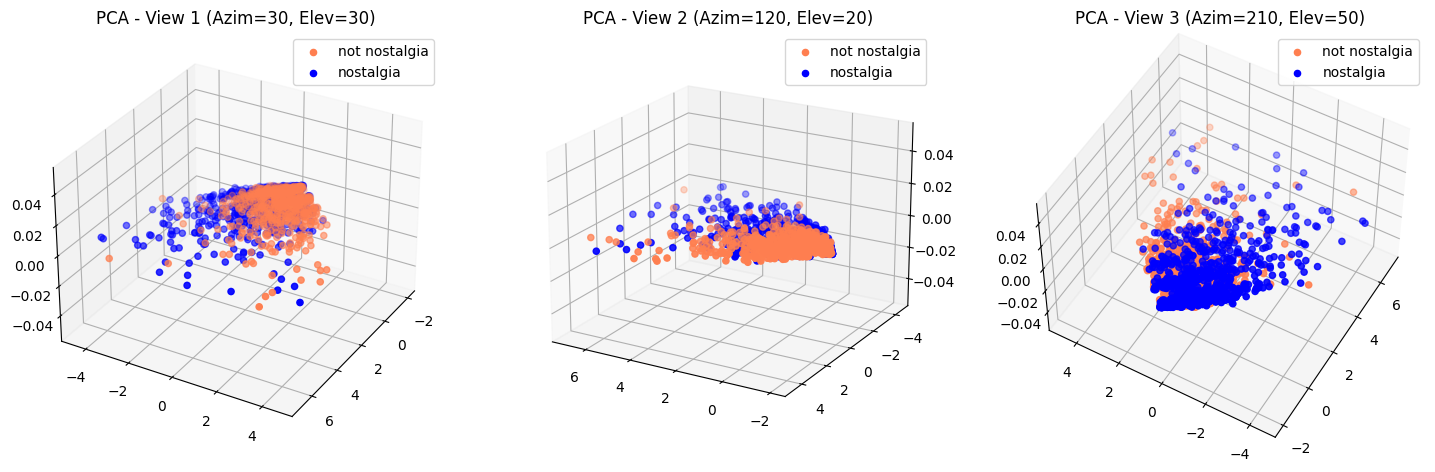

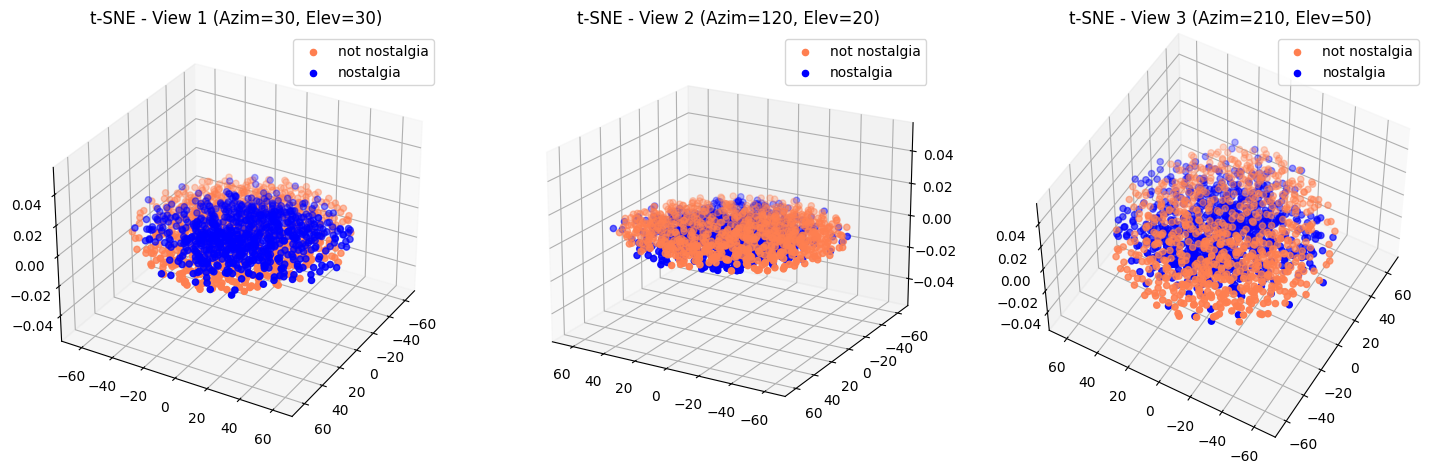

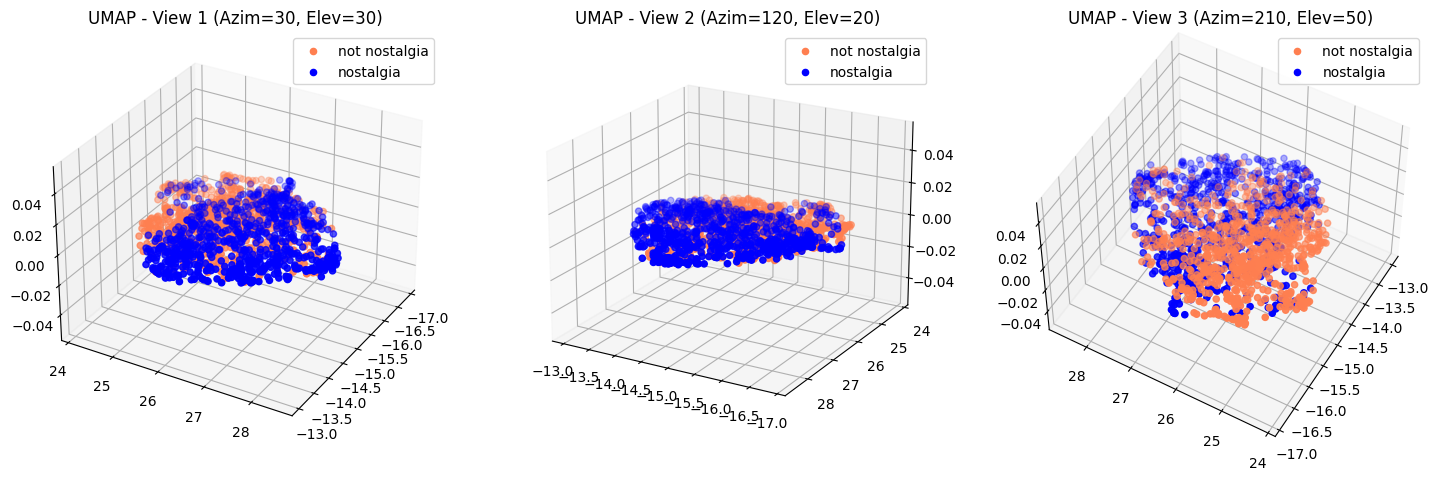

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

col = ['coral', 'blue']
sentiments = X['sentiment'].unique()
labels=X['sentiment'].values

def plot_3d_with_categories(X, labels, method_name):
    fig = plt.figure(figsize=(18, 6))

    # Plot from three different angles
    for i, (elev, azim) in enumerate([(30, 30), (20, 120), (50, 210)], start=1):
        ax = fig.add_subplot(1, 3, i, projection='3d')

        # Plot each category with a different color
        for idx, sentiment_number in enumerate(sentiments):
            sentiment_mask = labels == sentiment_number
            ax.scatter(X[sentiment_mask, 0], X[sentiment_mask, 1], 
                       color=col[idx], label=sentiment_number, marker='o')

        ax.set_title(f'{method_name} - View {i} (Azim={azim}, Elev={elev})')
        ax.view_init(elev=elev, azim=azim)
        ax.legend()  

    plt.show()


plot_3d_with_categories(X_pca_aug, labels, 'PCA')
plot_3d_with_categories(X_tsne_aug, labels, 't-SNE')
plot_3d_with_categories(X_umap_aug, labels, 'UMAP')

### Discretization and Binarization

In [80]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [81]:
mlb = preprocessing.LabelBinarizer()

In [82]:
mlb.fit(X.sentiment_number)

LabelBinarizer()

In [83]:
X['bin_sentiment']=mlb.transform(X['sentiment_number']).tolist()

In [84]:
X[0:10]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

   sentiment_number                                           unigrams  \
0                 1  [He, was, a, singer, with, a, golden, voice, t...   
1                 0  [The, mist, beautiful, voice, ever, I, listene...   
2                 0  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                 1  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                 0  [listening, to, his, songs, reminds, me, of, m...   
5                 0  [Every, time, I, heard, this, song, as, a, chi...   
6                 0  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7                 0  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8                 1   [Wherever, you, are, you, always, in, my, heart]   
9                 1  [Elvis, will, always, be, number, one, no, one...   

                                      tokenized_text bin_sentiment  
0  {Jim, emotional, hear, Although, now,, we, his...           [1]  
1  {ever, an, his, The, mist, of, singing, him, N...           [0]  
2  {Mr., how, sounds, no, sweet,, like, his, neve...           [0]  
3  {Mary, back, blessing, came, Now,, 47, Viet, o...           [1]  
4  {reminds, him, his, songs, everyday, mum, me, ...           [0]  
5  {fear, Jim, got, touches, me, your, of, this, ...           [0]  
6  {back, how, Jim, loved, teenager, me, My, for,...           [0]  
7  {Jim, TO, puts, his, music., me, nostalgic, Re...           [0]  
8        {heart, in, always, you, my, are, Wherever}           [1]  
9  {taking, number, no, Elvis, always, can, his, ...           [1]

In [85]:
mlb = preprocessing.LabelBinarizer()

In [86]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [87]:
X['bin_sentiment']=mlb.transform(X['sentiment']).tolist()

In [88]:
X[0:10]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

   sentiment_number                                           unigrams  \
0                 1  [He, was, a, singer, with, a, golden, voice, t...   
1                 0  [The, mist, beautiful, voice, ever, I, listene...   
2                 0  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                 1  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                 0  [listening, to, his, songs, reminds, me, of, m...   
5                 0  [Every, time, I, heard, this, song, as, a, chi...   
6                 0  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7                 0  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8                 1   [Wherever, you, are, you, always, in, my, heart]   
9                 1  [Elvis, will, always, be, number, one, no, one...   

                                      tokenized_text bin_sentiment  
0  {Jim, emotional, hear, Although, now,, we, his...           [1]  
1  {ever, an, his, The, mist, of, singing, him, N...           [0]  
2  {Mr., how, sounds, no, sweet,, like, his, neve...           [0]  
3  {Mary, back, blessing, came, Now,, 47, Viet, o...           [1]  
4  {reminds, him, his, songs, everyday, mum, me, ...           [0]  
5  {fear, Jim, got, touches, me, your, of, this, ...           [0]  
6  {back, how, Jim, loved, teenager, me, My, for,...           [0]  
7  {Jim, TO, puts, his, music., me, nostalgic, Re...           [0]  
8        {heart, in, always, you, my, are, Wherever}           [1]  
9  {taking, number, no, Elvis, always, can, his, ...           [1]

## Data Exploration

In [89]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [90]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Visualization

In [100]:
#wordcloud
!pip install wordcloud 


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


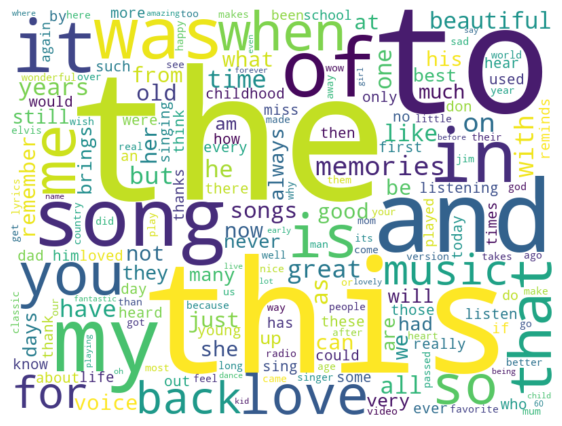

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

X_tdm = count_vect.fit_transform(X['comment'])  
terms = count_vect.get_feature_names_out()

term_frequencies = np.array(X_tdm.sum(axis=0)).flatten()


term_freq_dict = dict(zip(terms, term_frequencies))

wc = WordCloud(
    background_color="white",
    width=800,
    height=600
)

wordcloud = wc.generate_from_frequencies(term_freq_dict)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [102]:
import pandas as pd

# Convert the term-document matrix (TDM) to a DataFrame
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Sum the term frequencies across all documents
term_frequencies = tdm_df.sum(axis=0)

# Sort terms by their total frequency (in descending order)
sorted_tdm = term_frequencies.sort_values(ascending=False)


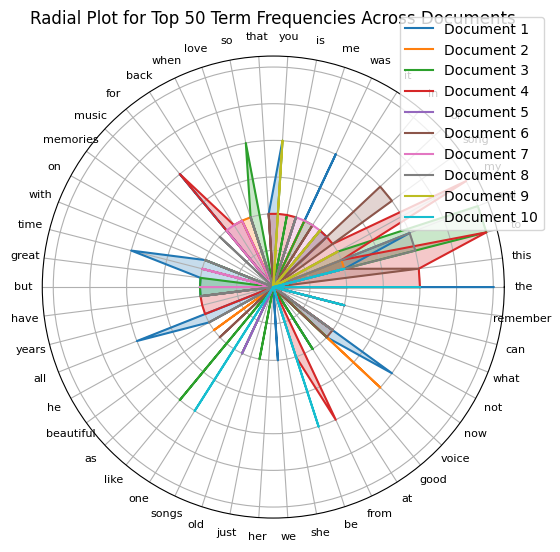

In [103]:
#this is the radial chart without using final pattern (unique one)
import matplotlib.pyplot as plt
import numpy as np

# Choose the top 50 terms to visualize
selected_terms = sorted_tdm.head(50).index

# Extract term frequencies for the first 10 documents for these selected terms
values = tdm_df[selected_terms].head(10).values
categories = selected_terms

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, values[:, [0]]), axis=1)  # Complete the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data for the first 10 documents
for i, row in enumerate(values):
    ax.plot(angles, row, label=f'Document {i+1}')
    ax.fill(angles, row, alpha=0.25)

# Set up labels and formatting
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=8)
plt.title('Radial Plot for Top 50 Term Frequencies Across Documents')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

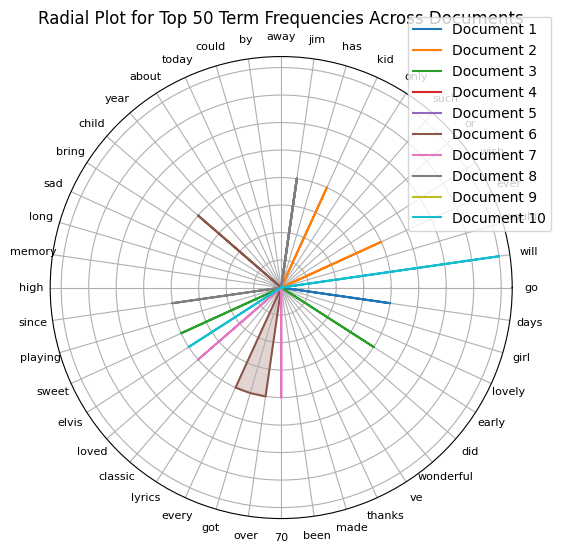

In [104]:
#this is the radial chart with using final pattern (unique one)

selected_terms = final_pattern_df['Patterns'].head(50)
values = tdm_df[selected_terms].head(10).values
categories = selected_terms


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, values[:, [0]]), axis=1)  # Complete the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data for the first 10 documents
for i, row in enumerate(values):
    ax.plot(angles, row, label=f'Document {i+1}')
    ax.fill(angles, row, alpha=0.25)

# Set up labels and formatting
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=8)
plt.title('Radial Plot for Top 50 Term Frequencies Across Documents')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


## Data Classification

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_number', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_number'], test_size=0.3, random_state=42)

In [93]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [94]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [95]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [96]:
sentiment_mapping = dict(X[['sentiment_number', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_number'], test_size=0.3, random_state=42)

In [97]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  been  made  thanks  \
486    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
528    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
200    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
890    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
845    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...   ...     ...   
1131   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1295   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
861    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1460   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1127   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   

      ve  wonderful  did  early  lovely  girl  days  
486    0          0    0      0       0     0     0  
528    0          0    0      0       1     0     0  
200    0          0    0      0       0     0     0  
890    0          0    0      0       0     0     0  
845    0          0    0      0       0     0     0  
...   ..        ...  ...    ...     ...   ...   ...  
1131   0          0    0      0       0     0     0  
1295   0          0    0      0       0     0     1  
861    0          0    0      0       0     0     0  
1460   0          0    0      0       0     0     0  
1127   0          0    0      0       0     0     0  

[1049 rows x 3774 columns]

In [98]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  been  made  thanks  \
1117   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1396   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
423    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
414    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
452    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   ...   ...     ...   
1084   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
991    0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
651    0    0    0   0   0    0    0   0     0   0  ...     1     0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...     0     0       0   

      ve  wonderful  did  early  lovely  girl  days  
1117   0          0    0      0       0     0     0  
1396   0          0    0      0       0     0     0  
423    0          0    0      0       0     0     0  
414    0          0    0      0       0     0     0  
452    0          0    0      0       1     0     0  
...   ..        ...  ...    ...     ...   ...   ...  
1084   0          0    0      0       0     0     0  
991    0          0    0      0       0     0     0  
651    0          0    0      0       0     0     0  
1188   0          0    0      0       0     0     0  
1459   0          0    0      0       0     0     0  

[450 rows x 3774 columns]

In [99]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8199    0.9571    0.8832       233
not nostalgia     0.9438    0.7742    0.8506       217

     accuracy                         0.8689       450
    macro avg     0.8818    0.8656    0.8669       450
 weighted avg     0.8796    0.8689    0.8675       450



## tf-idf

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf_X = vectorizer.fit_transform(X['comment'])

terms = vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {tf_idf_X.shape}") 


TF-IDF matrix shape: (1499, 3730)


In [106]:
tf_idf_X[0:5,0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23196919, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [107]:
tf_idf_X_df=pd.DataFrame(tf_idf_X.toarray(), columns=terms, index=X.index)
tf_idf_X_df[:10]

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
5    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
6    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
7    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
8    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
9    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[10 rows x 3730 columns]

In [108]:
#create a Naive Bayes
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_number', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tf_idf_X_df, X['sentiment_number'], test_size=0.3, random_state=42)

In [114]:
target_names

['nostalgia', 'not nostalgia']

In [115]:
X_train.shape

(1049, 3730)

In [113]:
X_train[:10]

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
486   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
528   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
200   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
890   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
845   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1069  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1205  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1055  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
10    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
148   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
528     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
200     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
890     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
845     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1069    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1205    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1055    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
10      0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
148     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[10 rows x 3730 columns]

In [112]:
y_train

486     1
528     1
200     1
890     1
845     0
       ..
1131    0
1295    1
861     1
1460    1
1127    0
Name: sentiment_number, Length: 1049, dtype: int64

In [111]:
tf_idf_nb_classifier = MultinomialNB()
tf_idf_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tf_idf_nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8132    0.9528    0.8775       233
not nostalgia     0.9379    0.7650    0.8426       217

     accuracy                         0.8622       450
    macro avg     0.8755    0.8589    0.8601       450
 weighted avg     0.8733    0.8622    0.8607       450



In [110]:
tf_idf_nb_classifier = BernoulliNB()
tf_idf_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tf_idf_nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8521    0.9399    0.8939       233
not nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



## Comment

1. If we use the word_frequency (tdm_df) as the training data in the classifier, its accuracy is: 0.8688888888888889. Compared to the pattern extract data ( augmented_df), they got different precision and recall but same accuracy. However, it is worth noting that 'not nostalgia' in the both dataset (tdf & aug), the precision is 0.9 up, but the recall is around 0.7. It shows that we actually get more the false negative than false positive in this sentiment. The higher false negatives (lower recall) in the 'not nostalgia' category suggest that the model is more conservative in classifying something as 'not nostalgia,' resulting in fewer instances being correctly captured.
   
2. Then, I use the tf-idf dataset into the same type of model (multinnominal NB), I got lower accuracy. That might result from a few reason, like the Multinomial Naive Bayes generally works well with frequency counts because it assumes features follow a multinomial distribution. The distribution of the features from TF-IDF may not fit this assumption as well, leading to lower performance.

3. Therefore, I tried another model called Bernoulli Naive Bayes. It shows better accuracy (0.8844) than all the other models above. Compared to the multinnomial naive bayes with same dataset(tf-idf), almost all the numbers increase. Especially for the recall, it achieves noticiable improvement(0.8249). The Bernoulli Naive Bayes effectively reducing the number of false negatives. I think it is because the Bernoulli is designed for binary features. TF-IDF can approximate binary-like behavior since it assigns lower weights to less frequent words, mimicking the presence/absence of terms.

## Improvement

1. Naive Bayes is quite suitable for raw values of word frequency. However, when a dataset transform into TF-idf format, which results in fractional values. Logistic Regression becomes a better candidate for handling the sparsity and continuous nature of TF-IDF features.
2. 